Estructuras_Dataframe

In [50]:
# Importación de Módulos:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Ejercicio 1:

Descarga el dataset adjunto precio alquiler por trimestre y barri.csv  extraído de la web OpenDataBCN y resume estadísticamente y gráficamente.

Crea al menos una visualización para:

• Una variable categórica (Distrito o Barrio)
• Una variable numérica (Precio)
• Una variable numérica y una categórica (Distrito y Precio)
• Dos variables numéricas (Año o Trimestre y Precio)
• Tres variables (Barrio o Distrito, Trimestre y Precio)

In [51]:
df=pd.read_csv("preu lloguer per trimestre i barri.csv")
df

,Any,Trimestre,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Lloguer_mitja,Preu
0,2021,1,1,Ciutat Vella,1,el Raval,Lloguer mitjà mensual (Euros/mes),759.2
1,2021,1,1,Ciutat Vella,2,el Barri Gòtic,Lloguer mitjà mensual (Euros/mes),929.6
2,2021,1,1,Ciutat Vella,3,la Barceloneta,Lloguer mitjà mensual (Euros/mes),808.9
3,2021,1,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",Lloguer mitjà mensual (Euros/mes),879.4
4,2021,1,2,Eixample,5,el Fort Pienc,Lloguer mitjà mensual (Euros/mes),918.0
...,...,...,...,...,...,...,...,...
579,2021,4,10,Sant Martí,69,Diagonal Mar i el Front Marítim del Poblenou,Lloguer mitjà per superfície (Euros/m2 mes),15.2
580,2021,4,10,Sant Martí,70,el Besòs i el Maresme,Lloguer mitjà per superfície (Euros/m2 mes),10.8
581,2021,4,10,Sant Martí,71,Provençals del Poblenou,Lloguer mitjà per superfície (Euros/m2 mes),13.8
582,2021,4,10,Sant Martí,72,Sant Martí de Provençals,Lloguer mitjà per superfície (Euros/m2 mes),11.7


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584 entries, 0 to 583
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Any             584 non-null    int64 
 1   Trimestre       584 non-null    int64 
 2   Codi_Districte  584 non-null    int64 
 3   Nom_Districte   584 non-null    object
 4   Codi_Barri      584 non-null    int64 
 5   Nom_Barri       584 non-null    object
 6   Lloguer_mitja   584 non-null    object
 7   Preu            584 non-null    object
dtypes: int64(4), object(4)
memory usage: 36.6+ KB


In [53]:
# Se transforma la varible 'Preu' a tipo de dato  float:

df['Preu'] = df['Preu'].apply(lambda x: float(x.split()[0].replace('--', '0')))

In [54]:
# Se verifica el cambio:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584 entries, 0 to 583
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Any             584 non-null    int64  
 1   Trimestre       584 non-null    int64  
 2   Codi_Districte  584 non-null    int64  
 3   Nom_Districte   584 non-null    object 
 4   Codi_Barri      584 non-null    int64  
 5   Nom_Barri       584 non-null    object 
 6   Lloguer_mitja   584 non-null    object 
 7   Preu            584 non-null    float64
dtypes: float64(1), int64(4), object(3)
memory usage: 36.6+ KB


• Limpieza del Dataframe:

In [55]:
df.duplicated().sum() # vemos si tenemos registros duplicados

0

In [56]:
df.isnull().sum() # vemos si tenemos datos nulos

Any               0
Trimestre         0
Codi_Districte    0
Nom_Districte     0
Codi_Barri        0
Nom_Barri         0
Lloguer_mitja     0
Preu              0
dtype: int64

In [57]:
df.isna().sum() # vemos si tenemos Nans

Any               0
Trimestre         0
Codi_Districte    0
Nom_Districte     0
Codi_Barri        0
Nom_Barri         0
Lloguer_mitja     0
Preu              0
dtype: int64

•Análisis Estadístico:

In [58]:
df['Lloguer_mitja'].unique()  # obtenemos las dos variables que nos dividen el dataset

array(['Lloguer mitjà mensual (Euros/mes)',
       'Lloguer mitjà per superfície (Euros/m2 mes)'], dtype=object)

In [59]:
preuLloguerMM = df['Lloguer_mitja'] == 'Lloguer mitjà mensual (Euros/mes)'  # filtramos el dataset original
df_preuLloguerMM = df[preuLloguerMM]   # dataframe con los precios medios mesuales
df_preuLloguerMM.shape

(292, 8)

In [60]:
df_preuLloguerMM.describe().round(2)

,Any,Trimestre,Codi_Districte,Codi_Barri,Preu
count,292.0,292.00,292.00,292.00,292.00
mean,2021.0,2.50,6.25,37.00,805.93
std,0.0,1.12,2.79,21.11,313.58
min,2021.0,1.00,1.00,1.00,0.00
25%,2021.0,1.75,4.00,19.00,703.35
50%,2021.0,2.50,7.00,37.00,804.95
75%,2021.0,3.25,8.00,55.00,927.75
max,2021.0,4.00,10.00,73.00,1816.50


Observamos que el valor del precio mínimo y máximo distan de la media, más el máximo que el mínimo, lo que nos da una distribución sesgada a la izquierda o positiva. Los valores del 25% y el 75% sí están cercanos al valor del 50%, por lo que podemos deducir que tenemos outliers.

In [61]:
# Lloguer mitjà per superfície (Euros/m2 mes):
preuLloguerMS = df['Lloguer_mitja'] == 'Lloguer mitjà per superfície (Euros/m2 mes)' # filtramos el dataset original
df_preuLloguerMS = df[preuLloguerMS] # dataframe con los precios medios por metro cuadrado
df_preuLloguerMS.shape

(292, 8)

In [62]:
mean_preuMS = df_preuLloguerMS['Preu'].mean()  # sustituimos los valores Nan de la columna 'Preu'
df_preuLloguerMS['Preu'].fillna(value=mean_preuMS, inplace = True)
df_preuLloguerMS.isna().sum() # vemos si tenemos Nans

C:\Users\crap-\AppData\Local\Temp\ipykernel_18036\4264850677.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_preuLloguerMS['Preu'].fillna(value=mean_preuMS, inplace = True)


Any               0
Trimestre         0
Codi_Districte    0
Nom_Districte     0
Codi_Barri        0
Nom_Barri         0
Lloguer_mitja     0
Preu              0
dtype: int64

In [63]:
df_preuLloguerMS.describe().round(2)

,Any,Trimestre,Codi_Districte,Codi_Barri,Preu
count,292.0,292.00,292.00,292.00,292.00
mean,2021.0,2.50,6.25,37.00,11.76
std,0.0,1.12,2.79,21.11,3.74
min,2021.0,1.00,1.00,1.00,0.00
25%,2021.0,1.75,4.00,19.00,11.40
50%,2021.0,2.50,7.00,37.00,12.65
75%,2021.0,3.25,8.00,55.00,13.52
max,2021.0,4.00,10.00,73.00,18.00


La distribución del precio del alquiler por metro cuadrado está más centrada en su media, la desviación estandar es pequeña y los valores recogidos en los cuartiles son proporcionados.

• Visualizaciones de los Datos:

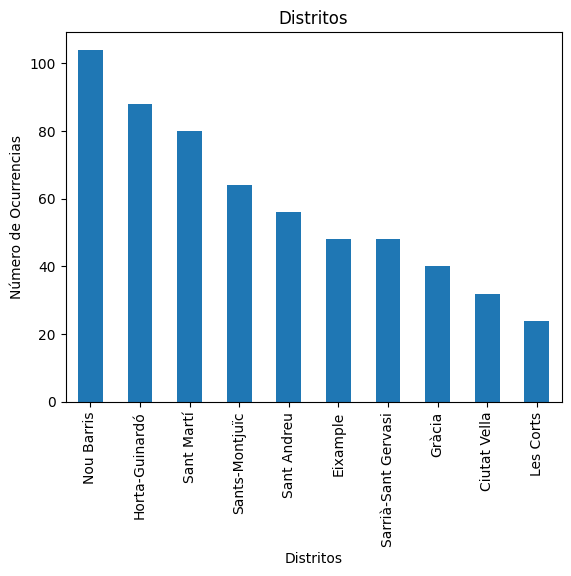

In [64]:
# Visualización para una variable categórica (Districte o Barri):

df['Nom_Districte'].value_counts().plot(kind='bar')

plt.title('Distritos')
plt.xlabel('Distritos')
plt.ylabel('Número de Ocurrencias')


# Se exporta el gráfico como imagen:
plt.savefig("Gráfico_1.jpg", bbox_inches='tight')

plt.show()

Observamos que hay más viviendas alquiladas por año en los distritos de Nou Barris, Horta-Guinardó y Sant Martí, y menos en Les Corts, Ciutat Vella y Gràcia.

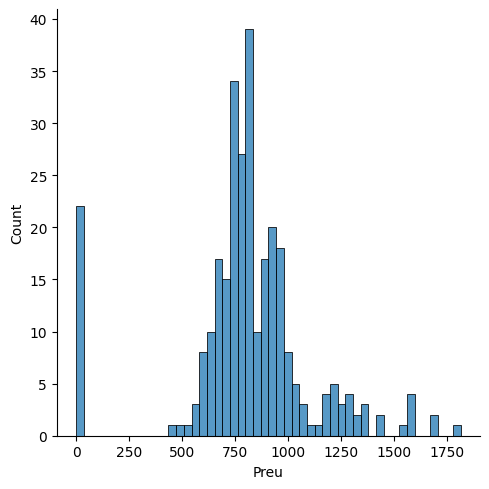

In [65]:
# Visualización para una variable numérica (Preu):

sns.displot(df_preuLloguerMM, x="Preu", bins=50);

plt.savefig("Gráfico_2.png");

La distribución del precio medio mensual es unimodal y confirma el análisis estadístico de una distribución sesgada positiva. La mayoría de alquileres se agrupan alrededor de la media y unos pocos son mucho más altos de la media.

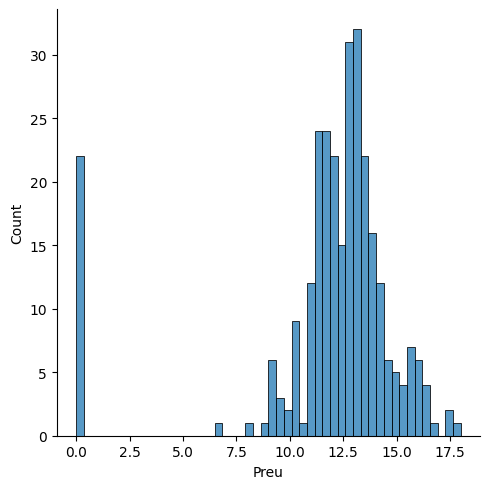

In [66]:
sns.displot(df_preuLloguerMS, x="Preu", bins=50)
plt.savefig("Gráfico_3.png");

La dristribución del precio medio por superficie es unimodal y mucho más centrada en la media.

<Figure size 1500x800 with 0 Axes>

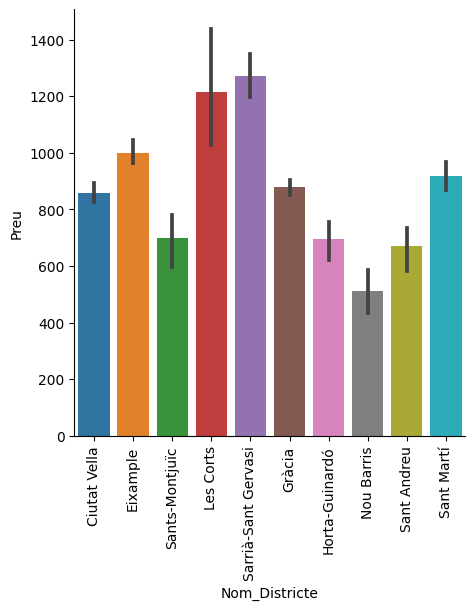

In [67]:
# Visualización para una variable numérica y una categórica (Districte i Preu):

plt.figure(figsize = (15,8))
sns.catplot(data=df_preuLloguerMM, x='Nom_Districte', y='Preu', kind="bar")
plt.xticks(rotation=90)
plt.savefig("Gráfico_4.png");

<Figure size 1500x800 with 0 Axes>

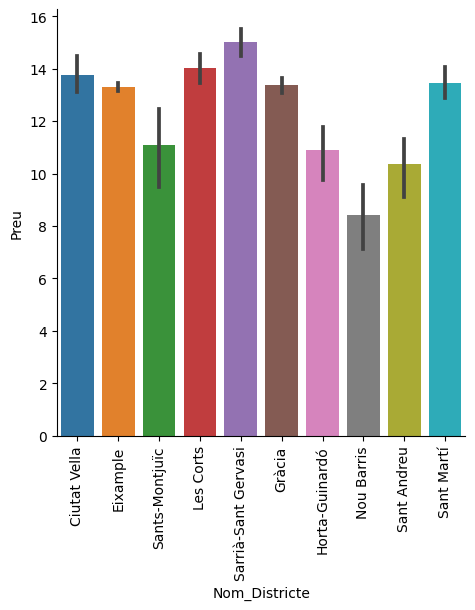

In [68]:
plt.figure(figsize = (15,8))
sns.catplot(data=df_preuLloguerMS, x='Nom_Districte', y='Preu', kind="bar")
plt.xticks(rotation=90)
plt.savefig("Gráfico_5.png");

Observamos en la gráfica anterior que el alquiler mensual del distrito de Gracia está en la media, sin embargo el precio del alquiler por metro cuadrado en más alto de la media, podemos deducir que las viviendas que se alquilan tienen una superfice menor que en otros distritos.

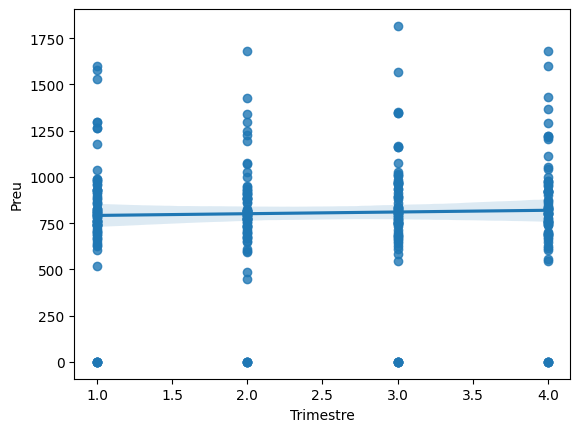

In [69]:
# Dos variables numéricas (Any o Trimestre i Preu)
sns.regplot(x=df_preuLloguerMS["Trimestre"], y=df_preuLloguerMM["Preu"]) 
plt.savefig("Gráfico_6.png");

En esta gráfica podemos ver que la dinámica de los alquileres es similar en todos los trimestres. También podemos ver que la gran mayoría de valores extremos están por encima de la media.

c:\Users\crap-\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)


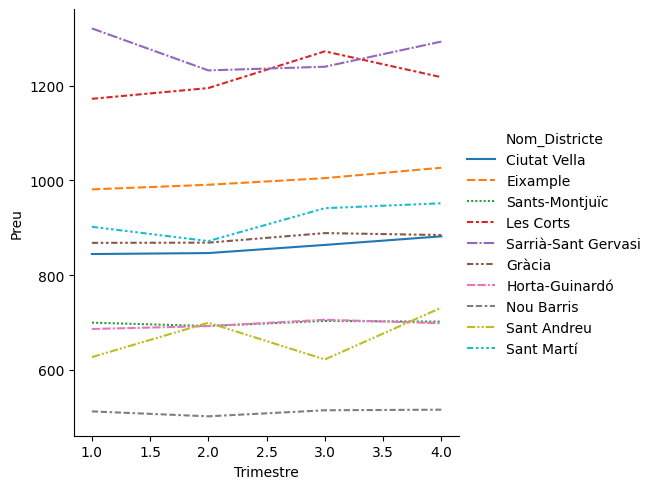

In [70]:
# Tres variables (Barri o Districte, Trimestre i Preu):
sns.relplot(
    data=df_preuLloguerMM, kind="line",
    x="Trimestre", y="Preu", hue="Nom_Districte", style="Nom_Districte", ci=None)
plt.savefig("Gráfico_7.png");

El resultado nos muestra cláramente qué barrios son más asequibles para alquilar. Refleja también que el alquiler a lo largo del año tiene pocas variaciones.

Ejercicio 3:

Propone alguna visualización que creas que puede resultar interesante.

Me perece interesante ver cómo se distruye el alquiler por barrios en los distritos. Trabajaremos tres distritos por sus particularidades: Gràcia, Sarrià y Nou Barris.

In [71]:
# Distrito de Gràcia:

df_preuLloguerMMGracia = df_preuLloguerMM.loc[df_preuLloguerMM.Nom_Districte == 'Gràcia']
df_preuLloguerMMGracia['Nom_Barri'].unique()

array(['Vallcarca i els Penitents', 'el Coll', 'la Salut',
       'la Vila de Gràcia', "el Camp d'en Grassot i Gràcia Nova"],
      dtype=object)

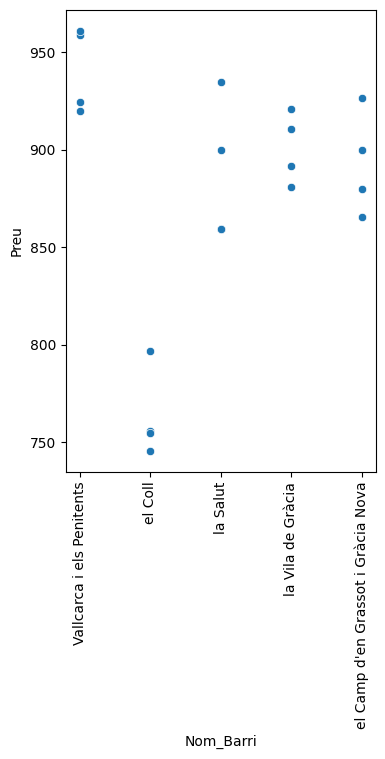

In [72]:
plt.figure(figsize = (4,6))
sns.scatterplot(data=df_preuLloguerMMGracia, x="Nom_Barri", y="Preu", legend=False)
plt.xticks(rotation=90)

plt.savefig("Gráfica_8.png");

In [73]:
# Distrito de Sarrià-Sant Gervasi:

df_preuLloguerMMSarria = df_preuLloguerMM.loc[df_preuLloguerMM.Nom_Districte == 'Sarrià-Sant Gervasi']
df_preuLloguerMMSarria['Nom_Barri'].unique()

array(['Vallvidrera, el Tibidabo i les Planes', 'Sarrià',
       'les Tres Torres', 'Sant Gervasi - la Bonanova',
       'Sant Gervasi - Galvany', 'el Putxet i el Farró'], dtype=object)

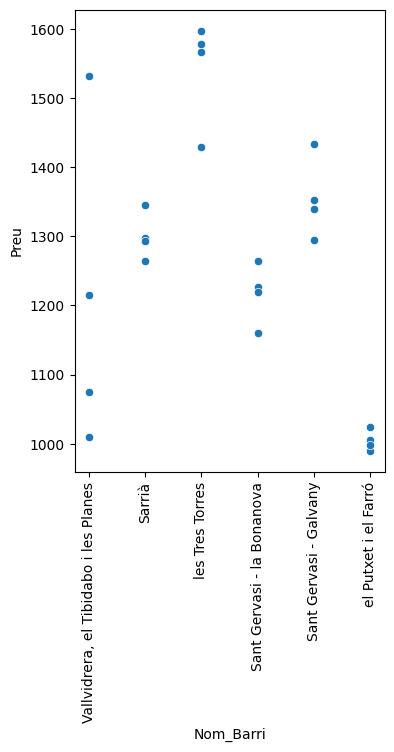

In [74]:
plt.figure(figsize = (4,6))
sns.scatterplot(data=df_preuLloguerMMSarria, x="Nom_Barri", y="Preu", legend=False)
plt.xticks(rotation=90)
plt.savefig("Gráfica_9.png");

In [75]:
# Nou Barris:

df_preuLloguerMMNouBarris = df_preuLloguerMM.loc[df_preuLloguerMM.Nom_Districte == 'Nou Barris']
df_preuLloguerMMNouBarris['Nom_Barri'].unique()

array(['Vilapicina i la Torre Llobeta', 'Porta', 'el Turó de la Peira',
       'Can Peguera', 'la Guineueta', 'Canyelles', 'les Roquetes',
       'Verdun', 'la Prosperitat', 'la Trinitat Nova', 'Torre Baró',
       'Ciutat Meridiana', 'Vallbona'], dtype=object)

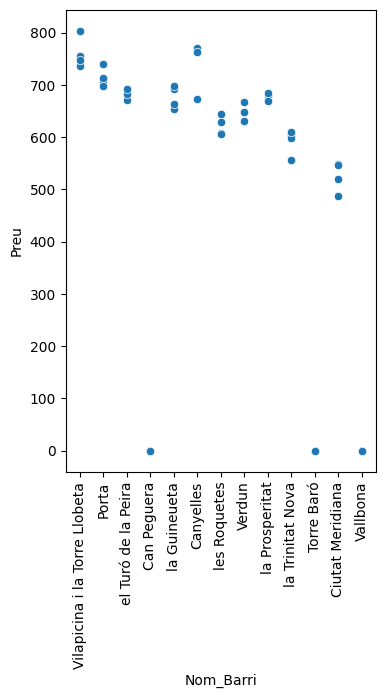

In [76]:
plt.figure(figsize = (4,6))
sns.scatterplot(data=df_preuLloguerMMNouBarris, x="Nom_Barri", y="Preu", legend=False)
plt.xticks(rotation=90)

plt.savefig("Gráfica_10.png");

Queda en estas gráficas reflejada la diferencia del precio del alquiler mensual por barrios dentro de un mismo distrito. Vemos una marcada diferencia en el barrio de El Coll en Gràcia, El Putxet el Sarrià y Ciutat Meridiana en Nou Barris.